## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.
### Step 1: Importing and Merging Data
### Step 2: Inspecting the Dataframe
### Step 3: Data Preparation
### Step 4: Test-Train Split
### Step 5: Feature Scaling
### Step 6: Correlation Analysis
### Step 7: Model Building
### Step 8: Feature Selection Using RFE
### Step 9: Plot ROC Curve
### Step 10: Finding Optimal Cutoff Point
### Step 11: Making predictions on the test set

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Importing and Merging Data

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [6]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [8]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
## Shape of the given datset
telecom.shape

(7043, 21)

In [10]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [12]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the telecom list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [14]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [16]:
telecom.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

In [17]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'.
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis = 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'.
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis =1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis =1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'.
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis =1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


#### Dropping the repeated variables

In [19]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis = 1)

In [20]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
#telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric=True)

In [21]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

#### Checking for Outliers

In [22]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


#### Checking for Missing Values and Inputing Them

In [24]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [25]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [26]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [27]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

### Step 4: Test-Train Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Putting feature variable to X
X = telecom.drop(['Churn', 'customerID'], axis = 1)

# Putting the response variable to y
y = telecom['Churn']

In [30]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [31]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

### Step 5: Feature Scaling

In [33]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,False,False,...,False,True,True,False,True,False,False,True,False,True
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,False,False,...,False,True,False,True,True,False,True,False,True,False
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,False,False,...,False,True,False,True,False,True,False,True,False,True
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,False,False,...,True,False,False,True,False,True,False,True,False,True


In [34]:
### Checking the Churn Rate
churn = (sum(telecom['Churn']) / len(telecom['Churn'].index)) * 100
churn

# We have almost 26.5% of churn rate

26.578498293515356

### Step 6: Correlation Analysis

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

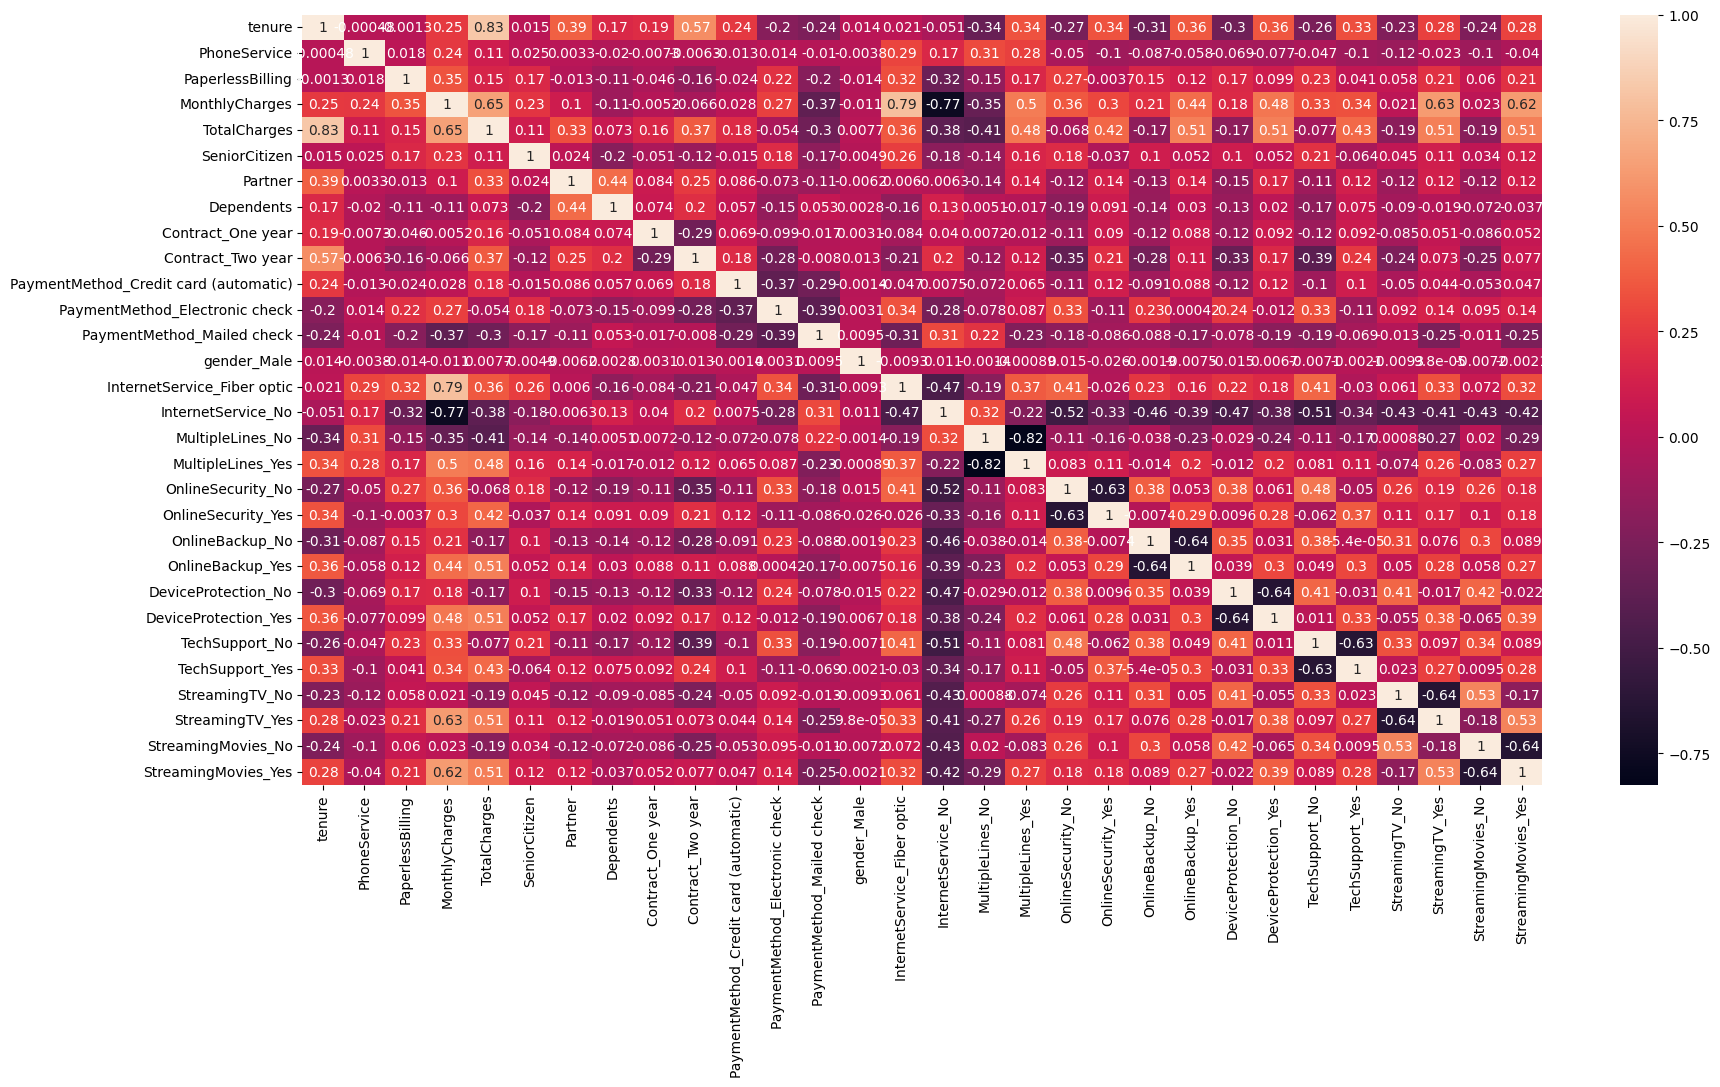

In [36]:
# let us see the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [37]:
#### Dropping highly correlated dummy variables

X_train = X_train.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], axis = 1)
X_test = X_test.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], axis = 1)

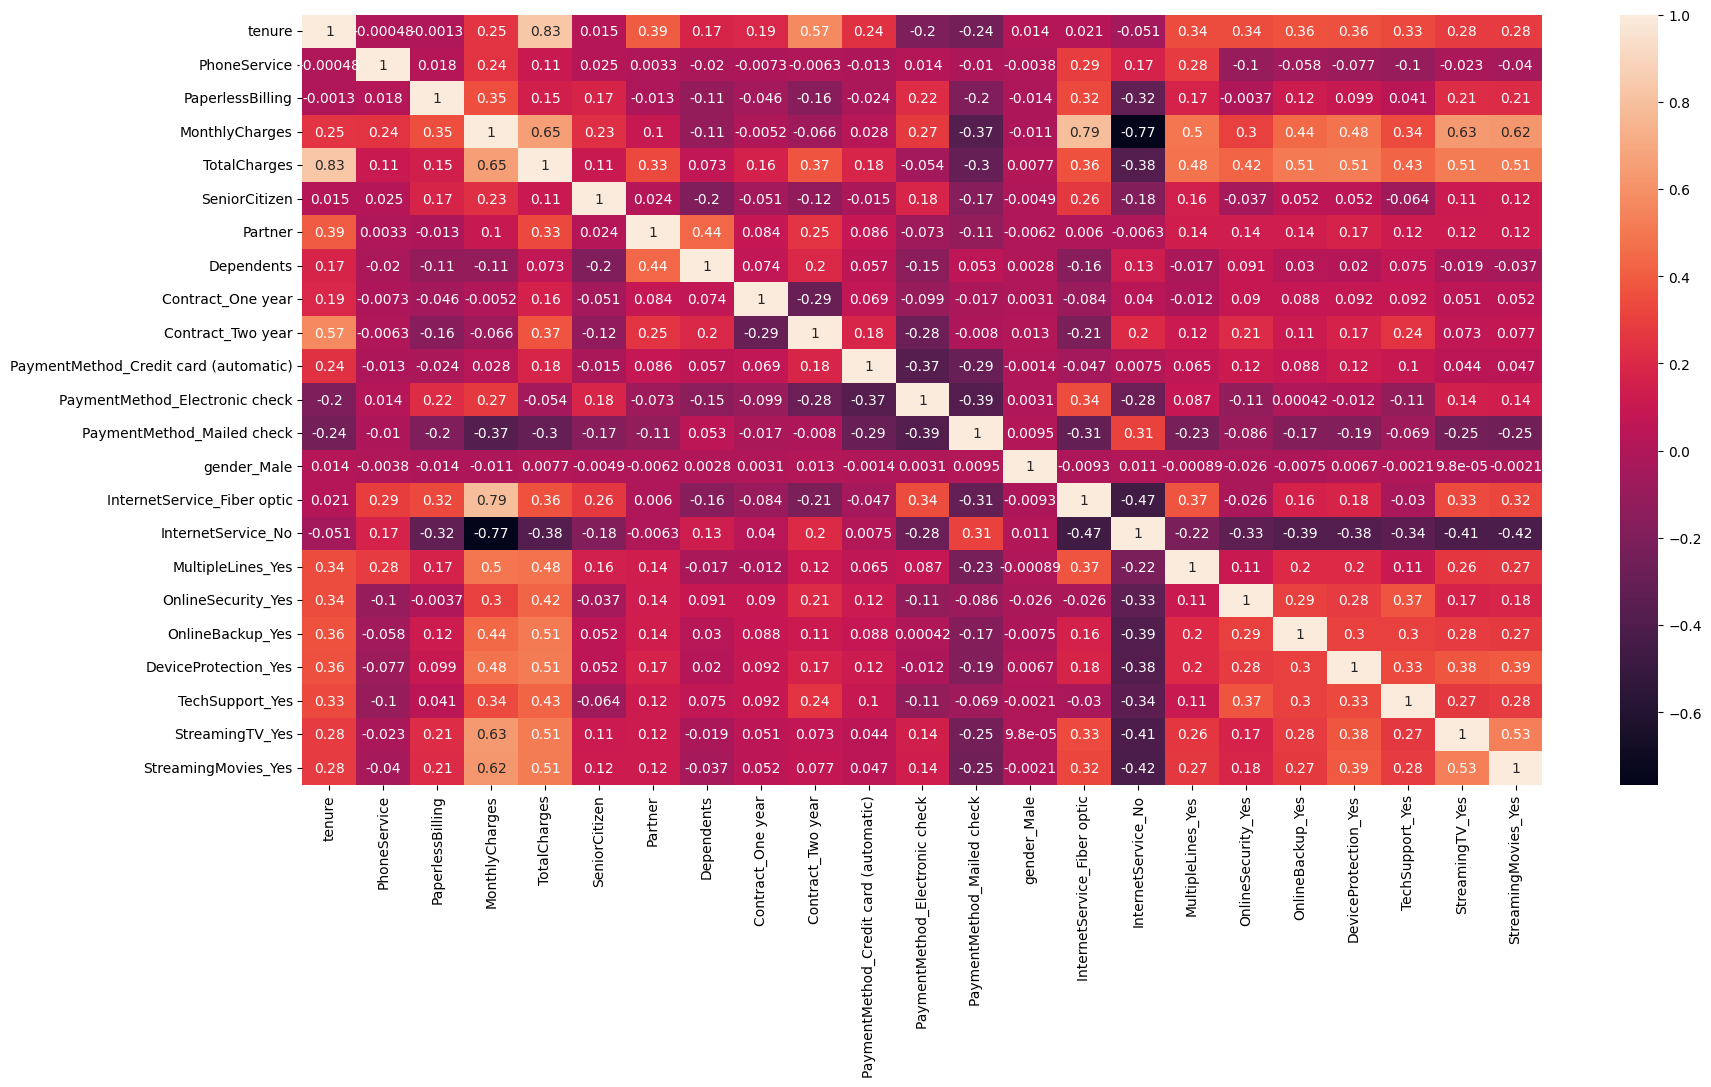

In [38]:
# let us see the correlation matrix after dropping highly correlated columns
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 879 to 5649
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4922 non-null   float64
 1   PhoneService                           4922 non-null   int64  
 2   PaperlessBilling                       4922 non-null   int64  
 3   MonthlyCharges                         4922 non-null   float64
 4   TotalCharges                           4922 non-null   float64
 5   SeniorCitizen                          4922 non-null   int64  
 6   Partner                                4922 non-null   int64  
 7   Dependents                             4922 non-null   int64  
 8   Contract_One year                      4922 non-null   bool   
 9   Contract_Two year                      4922 non-null   bool   
 10  PaymentMethod_Credit card (automatic)  4922 non-null   bool   
 11  Payment

In [40]:
bool_columns = X_train.select_dtypes(include=['bool']).columns
X_train[bool_columns] = X_train[bool_columns].astype(int)

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [41]:
# Running Your First Training Model
import statsmodels.api as sm

# Logistic regression model
X_train_const = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
result = logm1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 10 Apr 2025   Deviance:                       4009.4
Time:                        17:23:35   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Step 8: Feature Selection Using RFE

In [42]:
# Feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=logreg, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

In [43]:
print("Selected features:", X_train.columns[rfe.support_])


Selected features: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')


In [44]:
rfe.support_

array([ True, False, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True])

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('tenure', np.True_, np.int64(1)),
 ('PhoneService', np.False_, np.int64(5)),
 ('PaperlessBilling', np.False_, np.int64(2)),
 ('MonthlyCharges', np.True_, np.int64(1)),
 ('TotalCharges', np.True_, np.int64(1)),
 ('SeniorCitizen', np.True_, np.int64(1)),
 ('Partner', np.False_, np.int64(9)),
 ('Dependents', np.False_, np.int64(8)),
 ('Contract_One year', np.True_, np.int64(1)),
 ('Contract_Two year', np.True_, np.int64(1)),
 ('PaymentMethod_Credit card (automatic)', np.True_, np.int64(1)),
 ('PaymentMethod_Electronic check', np.False_, np.int64(6)),
 ('PaymentMethod_Mailed check', np.True_, np.int64(1)),
 ('gender_Male', np.False_, np.int64(10)),
 ('InternetService_Fiber optic', np.True_, np.int64(1)),
 ('InternetService_No', np.True_, np.int64(1)),
 ('MultipleLines_Yes', np.True_, np.int64(1)),
 ('OnlineSecurity_Yes', np.False_, np.int64(4)),
 ('OnlineBackup_Yes', np.False_, np.int64(7)),
 ('DeviceProtection_Yes', np.False_, np.int64(11)),
 ('TechSupport_Yes', np.False_, np.int64(3)),

In [46]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [47]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.8
Date:                Thu, 10 Apr 2025   Deviance:                       4041.6
Time:                        17:23:36   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2797
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [48]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


879     0.163642
5790    0.254667
6498    0.556098
880     0.520664
2784    0.670002
3874    0.366496
5387    0.544218
6623    0.792773
4465    0.201923
5364    0.476004
dtype: float64

In [49]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16364211, 0.25466655, 0.55609771, 0.52066367, 0.67000227,
       0.366496  , 0.54421765, 0.7927729 , 0.2019225 , 0.47600412])

In [50]:
##### Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.163642,879
1,0,0.254667,5790
2,1,0.556098,6498
3,1,0.520664,880
4,1,0.670002,2784


In [51]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,CustID,predicted
0,0,0.163642,879,0
1,0,0.254667,5790,0
2,1,0.556098,6498,1
3,1,0.520664,880,1
4,1,0.670002,2784,1


In [52]:
# Confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3276  359]
 [ 596  691]]


In [53]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8059731816334823


In [54]:
#### Checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range (X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,MonthlyCharges,13.74
2,TotalCharges,10.36
0,tenure,7.31
9,InternetService_No,4.90
8,InternetService_Fiber optic,4.57
5,Contract_Two year,2.82
11,StreamingTV_Yes,2.64
12,StreamingMovies_Yes,2.64
10,MultipleLines_Yes,2.28
4,Contract_One year,1.73


In [55]:
# Dropping column which has high VIFs

col = col.drop(['MonthlyCharges'], 1)
col

Index(['tenure', 'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [56]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.2
Date:                Thu, 10 Apr 2025   Deviance:                       4080.4
Time:                        17:23:36   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2740
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [57]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Churn_Prob'] = y_train_pred

In [58]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [59]:
# Let's check the overall accuracy.
print(f"Accuracy = {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}%")

Accuracy = 0.8021129622104836%


The accuracy is still practically the same.


##### Let's now check the VIFs again

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range (X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,TotalCharges,7.12
0,tenure,6.79
4,Contract_Two year,2.75
7,InternetService_Fiber optic,2.60
11,StreamingMovies_Yes,2.52
10,StreamingTV_Yes,2.51
8,InternetService_No,2.30
9,MultipleLines_Yes,2.22
3,Contract_One year,1.66
6,PaymentMethod_Mailed check,1.57


In [61]:
# Re-run the model without TotalCharges

col = col.drop(['TotalCharges'], 1)
col

Index(['tenure', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.6
Date:                Thu, 10 Apr 2025   Deviance:                       4083.2
Time:                        17:23:37   Pearson chi2:                 5.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2736
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [63]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Churn_Prob'] = y_train_pred

In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [65]:

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.802519301097115


In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range (X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,Contract_Two year,2.68
10,StreamingMovies_Yes,2.46
9,StreamingTV_Yes,2.44
6,InternetService_Fiber optic,2.42
8,MultipleLines_Yes,2.19
0,tenure,1.97
7,InternetService_No,1.82
2,Contract_One year,1.65
5,PaymentMethod_Mailed check,1.57
4,PaymentMethod_Credit card (automatic),1.39


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [67]:
# Let's take a look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3277  358]
 [ 614  673]]


In [68]:
# cross checking the accuracy will help us understand the model if its changed or not
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.802519301097115




# Actual/Predicted     not_churn    churn
        # not_churn       3277      358
        # churn            614      673  



## Metrics beyond simply accuracy

In [69]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
# Let's see the sensitivity of our logistic regression model
print("sensitivity =",  TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ", TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive rate =", FP/float(TN+FP))

# positive predictive value
print("Positive predicted rate =", TP/float(TP+FP))

# Negative predictive value
print ("Negative predicted Rate =", TN / float(TN+ FN))

sensitivity = 0.5229215229215229
specificity =  0.9015130674002751
False positive rate = 0.0984869325997249
Positive predicted rate = 0.6527643064985451
Negative predicted Rate = 0.8421999485993318


### Step 9: Plot ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [71]:
# Plot the ROC Curve
def draw_roc(actual, probs):
  fpr, tpr , thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
  auc_score = metrics.roc_auc_score(actual, probs)
  plt.figure(figsize = (5,5))
  plt.plot(fpr, tpr, label = "ROC Curve(area = %0.2f)" % auc_score)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False positive rate or [1- True negative rate]")
  plt.ylabel("True positive rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc = "lower right")
  plt.show()
  return

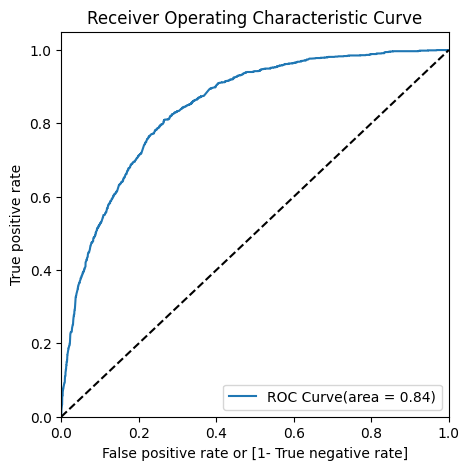

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [73]:
# finding the optimal cut off point

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
  y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: i if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.204339,879,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.215562,5790,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.639615,6498,1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3,1,0.687136,880,1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4,1,0.735303,2784,1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['Prob', 'Accuracy','Sensitivity', 'Specificity'])
from sklearn.metrics import confusion_matrix


# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# List of probability cutoffs to evaluate
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    # Create binary predictions based on the cutoff
    y_train_pred_final['Predicted_Label'] = y_train_pred_final['Churn_Prob'].apply(lambda x: 1 if x >= i else 0)

# Compute the confusion matrix
    cm1 = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted_Label'])

# Calculate accuracy, sensitivity, and specificity
    total1 = sum(sum(cm1))
    Accuracy = (cm1[0,0] + cm1[1,1]) / total1
    Specificity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    Sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])

# Store the results in the DataFrame
    cutoff_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]

print(cutoff_df)



     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.261479     1.000000     0.000000
0.1   0.1  0.608086     0.943279     0.489409
0.2   0.2  0.716782     0.851593     0.669051
0.3   0.3  0.763308     0.781663     0.756809
0.4   0.4  0.789313     0.644911     0.840440
0.5   0.5  0.802519     0.522922     0.901513
0.6   0.6  0.799878     0.387723     0.945805
0.7   0.7  0.773466     0.184926     0.981843
0.8   0.8  0.745429     0.031080     0.998349
0.9   0.9  0.738521     0.000000     1.000000


## Plot accuracy sensitivity and specificity for various probabilities.

<function matplotlib.pyplot.show(close=None, block=None)>

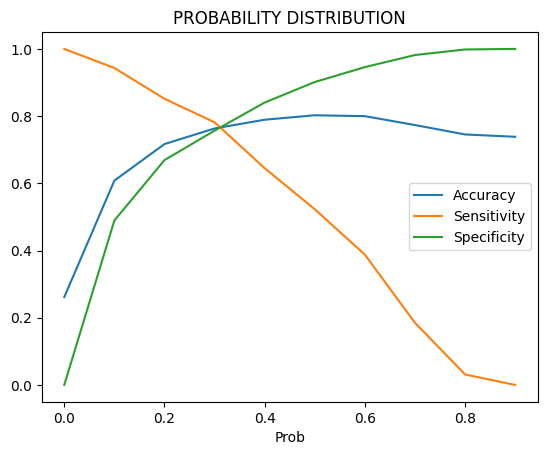

In [75]:
cutoff_df.plot.line(x = 'Prob', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.title("PROBABILITY DISTRIBUTION")
plt.show

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_Label,final_predicted
0,0,0.204339,879,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0.215562,5790,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1,0.639615,6498,1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0,1
3,1,0.687136,880,1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0,1
4,1,0.735303,2784,1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0,1


In [77]:
# Let's check the overall accuracy.
print("Overall Accuracy:")
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

Overall Accuracy:


0.76330759853718

In [78]:
print('Confusion Matrix')
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

Confusion Matrix


array([[2751,  884],
       [ 281, 1006]])

In [79]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model

print(f'Sensitivity : {TP / float(TP+FN)}')


Sensitivity : 0.7816627816627817


In [81]:
# Let us calculate specificity
print(f"Specificity :{TN / float(TN+FP)}")

Specificity :0.756808803301238


## Calculate false postive rate - predicting churn when customer does not have churned

In [82]:
print(FP/ float(TN+FP))

0.24319119669876205


In [83]:
# Positive predictive value
print (TP / float(TP+FP))

0.5322751322751322


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9073218997361477


### Precition and Recall

In [85]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3277,  358],
       [ 614,  673]])

In [86]:
print("Precision =", confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision = 0.6527643064985451


In [87]:
print("Recall =", confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall = 0.5229215229215229


In [88]:
from sklearn.metrics import precision_score, recall_score

In [89]:
print("Precision =", precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("Recall =", recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

Precision = 0.6527643064985451
Recall = 0.5229215229215229


## Precision and Recall Curve
### In some cases, particularly with imbalanced datasets, a Precision-Recall curve might be used to find the threshold that provides the best tradeoff between precision and recall.


In [90]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Churn, y_train_pred_final.predicted


(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

Text(0.5, 1.0, 'Precision vs Recall trade off')

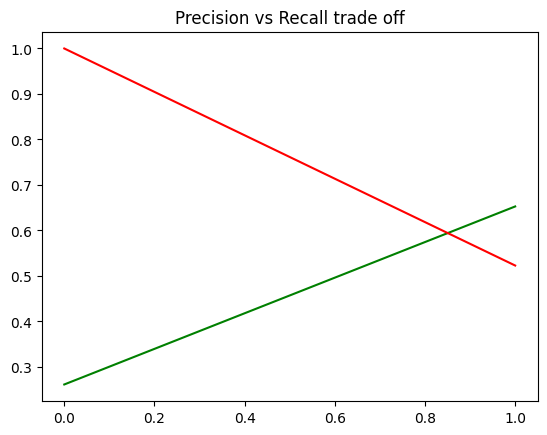

In [91]:
p , r , thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision vs Recall trade off")

$ Observation:$
#### Based on the Precision and Recall trade off graph chosen cutoff is 0.82
    

The choice of a cutoff value, such as 0.82, is often based on the specific context and goals of the classification problem. In binary classification, the probability cutoff determines the threshold above which a prediction is considered positive (e.g., churn) and below which it is considered negative (e.g., no churn). The default threshold is typically 0.5, but there are several reasons why you might choose a different threshold like 0.82:

Class Imbalance: If the classes are imbalanced (e.g., there are many more non-churners than churners), a lower threshold might help in identifying more positive cases, improving sensitivity/recall at the cost of specificity.

Cost-Benefit Analysis: The costs of false positives and false negatives might differ significantly. For example, if false negatives (not identifying a churner) are more costly than false positives (incorrectly identifying a non-churner as a churner), you might lower the threshold to reduce false negatives.

Optimization for Specific Metrics: Depending on the business requirements, you might optimize for metrics such as F1 score, sensitivity (recall), or precision. A threshold like 0.82 might have been found to optimize these metrics during model validation.

Receiver Operating Characteristic (ROC) Curve: The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) for various threshold values. The point closest to the top-left corner of the ROC space (where both sensitivity and specificity are high) can be chosen as the optimal threshold. This process might lead to a threshold like 0.82.



### Step 11: Making predictions on the test set

In [92]:
# test the data with y_test and X_test
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [93]:
X_test = X_test[col]
X_test.head()

,tenure,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,0,False,False,True,False,True,False,False,False,True
3730,0.999203,0,False,False,True,False,True,False,True,True,True
1761,1.040015,0,False,True,True,False,False,True,True,False,False
2283,-1.286319,0,False,False,False,True,True,False,False,False,False
1872,0.346196,0,False,True,False,False,False,True,False,False,False


In [94]:
y_test.head()

942     0
3730    1
1761    0
2283    1
1872    0
Name: Churn, dtype: int64

In [95]:
bool_columns = X_test.select_dtypes(include=['bool']).columns
X_test[bool_columns] = X_test[bool_columns].astype(int)

In [96]:
X_test_sm = sm.add_constant(X_test[col])


In [97]:

logm_test = sm.GLM(y_test, X_test_sm, family = sm.families.Binomial())
res = logm_test.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 2110
Model:                            GLM   Df Residuals:                     2098
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -925.02
Date:                Thu, 10 Apr 2025   Deviance:                       1850.0
Time:                        17:23:39   Pearson chi2:                 1.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2600
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [98]:
y_test_pred = res.predict(X_test_sm)

In [99]:
y_test_pred[:10]

942     0.491669
3730    0.328609
1761    0.008177
2283    0.598074
1872    0.013362
1970    0.617101
2532    0.235379
1616    0.007807
2485    0.588950
5914    0.214762
dtype: float64

In [100]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
942,0.491669
3730,0.328609
1761,0.008177
2283,0.598074
1872,0.013362
...,...
1289,0.038491
3508,0.052596
6765,0.006749
3598,0.382200


In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [102]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [103]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [104]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [105]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.491669
1,1,3730,0.328609
2,0,1761,0.008177
3,1,2283,0.598074
4,0,1872,0.013362


In [106]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [107]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['CustID', 'Churn', 'Churn_Prob'])

# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.491669
1,3730,1,0.328609
2,1761,0,0.008177
3,2283,1,0.598074
4,1872,0,0.013362


In [108]:
# Base don the precision and Recall trade off graph choosing cutoff as 0.82 , please use accordingly for your data
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.82 else 0)

### Confusion Matrix

In [109]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1528,    0],
       [ 580,    2]])

In [110]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

## Specificity & sensitivity of our logistic regression model


In [111]:
print(f"Sensitivity :{TP / float(TP+FN)}")
print(f"Specificity :{TN / float(TN+FP)}")

Sensitivity :0.003436426116838488
Specificity :1.0
